In [39]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [40]:
from simpledbf import Dbf5
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 200

Total fires: 19


,NAMN,Producent,GISHektar,Lannamn,CenterX,CenterY,Aktualitet,Kommunnamn,Metod,Kvalitet,...,shape_STLe,link,quality,comments,zone,road_distance,burntX,burntY,unburntX,unburntY
59,Näset,Skogsstyrelsen,14.0,Jämtlands län,6991496.0,573941.0,NaN,Ragunda,Manuell kartering - satellit,Granskad - God,...,2645.307067,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6991496&y=573941&scale=37502.2872&bg=KARTA,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
60,Äxingmyrkullen,Skogsstyrelsen,423.0,Jämtlands län,6972196.0,523718.0,NaN,Bräcke,Manuell kartering - satellit,Granskad - God,...,13051.529186,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6972196&y=523718&scale=37502.2872&bg=KARTA,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
64,Stor-Tävjeåsen,Skogsstyrelsen,174.0,Jämtlands län,6946993.0,442238.0,NaN,Härjedalen,Manuell kartering - satellit,Granskad - God,...,13456.816233,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6946993&y=442238&scale=37502.2872&bg=KARTA,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
65,Storbrättan,Skogsstyrelsen,945.0,Jämtlands län,6864555.0,445328.0,NaN,Härjedalen,Manuell kartering - satellit,Granskad - God,...,29464.301596,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6864555&y=445328&scale=37502.2872&bg=KARTA,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
71,Nötberget,Skogsstyrelsen,872.0,Gävleborgs län,6875431.0,512605.0,NaN,Ljusdal,Manuell kartering - flygbild,Granskad - Mycket god,...,23926.493060,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6875431&y=512605&scale=37502.2872&bg=KARTA,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
72,Ängra,Skogsstyrelsen,3797.0,Gävleborgs län,6865981.0,521772.0,NaN,Ljusdal,Manuell kartering - flygbild,Granskad - Mycket god,...,74584.699172,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6865981&y=521772&scale=37502.2872&bg=KARTA,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
73,Enskogen,Skogsstyrelsen,4326.0,Gävleborgs län,6872570.0,521777.0,NaN,Ljusdal,Manuell kartering - flygbild,Granskad - Mycket god,...,92744.530921,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6872570&y=521777&scale=37502.2872&bg=KARTA,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
91,Lillåsen - Fågelsjö,Skogsstyrelsen,3921.0,Jämtlands län,6853211.0,470122.0,NaN,Härjedalen,Manuell kartering - satellit,Granskad - God,...,46392.112136,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6853211&y=470122&scale=37502.2872&bg=KARTA,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
92,Trängslet,Skogsstyrelsen,3468.0,Dalarnas län,6831719.0,423684.0,NaN,Älvdalen,Manuell kartering - satellit,Granskad - God,...,70180.467633,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6831719&y=423684&scale=37502.2872&bg=KARTA,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
93,Lima,Skogsstyrelsen,501.0,Dalarnas län,6763630.0,401901.0,NaN,Malung,Manuell kartering - satellit,Granskad - God,...,17774.489994,https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x=6763630&y=401901&scale=37502.2872&bg=KARTA,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


Total fires: 19


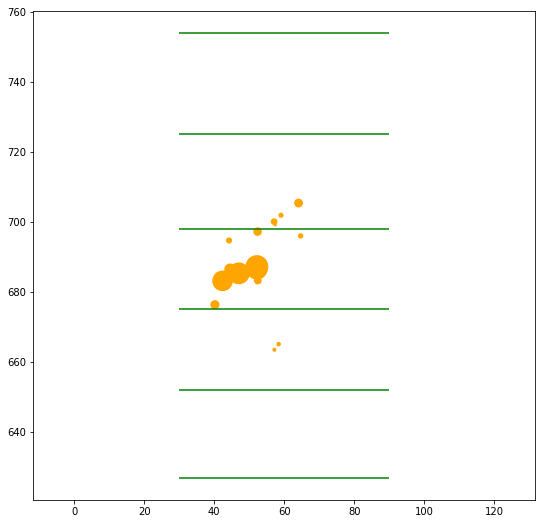

In [41]:
def plot(df):
    lines = [627,652,675,698,725,754]
    x = df["CenterY"]/10000
    y = df["CenterX"]/10000
    s = df["GISHektar"]/10
    print("Total fires: {}".format(len(df.index)))
    #display(df.head())
    plt.figure(figsize=(9,9))
    plt.scatter(x,y, s, color = 'orange', linewidths = 2)
    plt.hlines(lines,30,90, color = 'green')
    plt.axis('equal')
    plt.show()
    
def show_image(area): display(Image(filename='images/area_{}.png'.format(area)))
    
def write(df):
    og = pd.read_csv("./data/df.csv", index_col=0)
    og.update(df)
    og.to_csv("./data/df.csv")
    
def read(): return pd.read_csv("./data/df.csv", index_col = 0)

df = read()

#df = df[df.GISHektar ==222]
#df = df[df.zone == 2]
df = df[df.NAMN.notnull()]

#df = df[df.quality > 0]
#df = df.iloc[6]
#df.quality = 3
#df.comments = "This one looks to have obvious burning"
#df.road_distance = 600

#write(df)

print("Total fires: {}".format(len(df.index)))
display(df)
plot(df)

In [239]:
def read_dbf(): return Dbf5('data/brand.dbf').to_dataframe()
def setup_columns(df):
    df['link'] = "https://kartor.skogsstyrelsen.se/kartorapp/?startapp=skogligagrunddata&x="+df.CenterX.astype(str)+"&y="+df.CenterY.astype(str)+"&scale=37502.2872&bg=KARTA"
    df['quality'] = np.nan
    df['comments'] = np.nan
    df['zone'] = np.nan
    df['road_distance'] = np.nan
    df['burntX'] = np.nan
    df['burntY'] = np.nan
    df['unburntX'] = np.nan
    df['unburntY'] = np.nan
    df['satellite_date'] = np.nan
    return df
def be_careful():
    df = read_dbf()
    df = setup_columns(df)
    df.to_csv('data/df.csv')


